# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [98]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'C:/carnd/term1/Traffic-Signs-Project-Images/traffic-signs-data/train.p'
validation_file= 'C:/carnd/term1/Traffic-Signs-Project-Images/traffic-signs-data/valid.p'
testing_file = 'C:/carnd/term1/Traffic-Signs-Project-Images/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [99]:
import numpy as np
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = np.shape(X_train[0])

# TODO: How many unique classes/labels there are in the dataset.
# Given that the labels are numbered in increments of 1 and that sets covers all labels the number of labels 
# is max - min + 1 which is 43
n_classes = np.max(y_valid) - np.min(y_valid) + 1

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

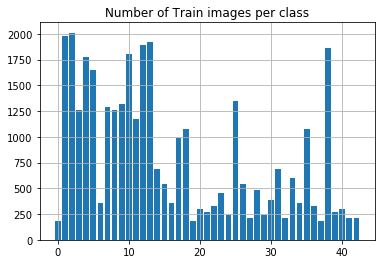

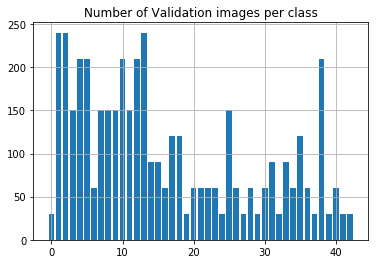

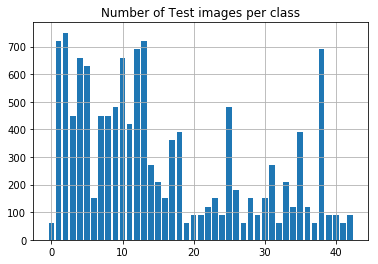

In [100]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import matplotlib.pyplot as plt

 
class_train, number_train = np.unique(y_train, return_counts=True)
plt.bar(class_train, number_train)
plt.grid()
plt.title("Number of Train images per class")
plt.show()

class_valid, number_valid = np.unique(y_valid, return_counts=True)
plt.bar(class_valid, number_valid)
plt.grid()
plt.title("Number of Validation images per class")
plt.show()

class_test, number_test = np.unique(y_test, return_counts=True)
plt.bar(class_test, number_test)
plt.grid()
plt.title("Number of Test images per class")
plt.show()

#%matplotlib inline
# show some random images
for p in range(0, 5):
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    plt.figure(figsize=(1,1))
    plt.imshow(image, cmap="gray")



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [101]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle

print(np.mean(X_train))
print(np.mean(X_valid))
print(np.mean(X_test))

X_train_gry = np.sum(X_train/3, axis=3, keepdims=True)
X_valid_gry = np.sum(X_valid/3, axis=3, keepdims=True)
X_test_gry = np.sum(X_test/3, axis=3, keepdims=True)

print(np.mean(X_train_gry))
print(np.mean(X_valid_gry))
print(np.mean(X_test_gry))

X_train_normalized = (X_train_gry - 128)/128 
X_valid_normalized = (X_valid_gry - 128)/128 
X_test_normalized = (X_test_gry - 128)/128

print(np.mean(X_train_normalized))
print(np.mean(X_valid_normalized))
print(np.mean(X_test_normalized))

X_train = X_train_normalized
X_validation = X_valid_normalized
y_validation = y_valid
X_test = X_test_normalized





82.677589037
83.5564273756
82.1484603612
82.677589037
83.5564273756
82.1484603612
-0.354081335648
-0.347215411128
-0.358215153428


### Model Architecture

In [102]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf

EPOCHS = 1200
BATCH_SIZE = 1024


from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    #Activation.
    #conv1 = tf.nn.sigmoid(conv1)
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    #  Activation.
    #conv2 = tf.nn.sigmoid(conv2)
    conv2 = tf.nn.relu(conv2)
    

    #  Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    
    #Layer 3: Convolutional. Input 5x5x16 Output = 3x3x400.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 16, 400), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(400))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    
    # Activation.
    conv3 = tf.nn.sigmoid(conv3)

    # Pooling. Input = 3x3x400. Output = 5x5x16.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    

    # Flatten and concatenate 5x5x16=400 and 5x5x16=400 i.e 800  
    fc0   = flatten(conv2)
    fc0_  = flatten(conv3)
    concat = tf.concat([fc0, fc0_], 1)
    
    concat = tf.nn.dropout(concat, keep_prob)

    
    # Layer 4: Fully Connected. Input = 800. Output = 43.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(800 , 43), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(43))
    fc1   = tf.matmul(concat, fc1_W) + fc1_b
    
    logits = fc1

    return logits


tf.reset_default_graph() 
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)


rate = 0.0008

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples



### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [9]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print("Batch Size ", BATCH_SIZE)
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        training_accuracy = evaluate(X_train, y_train)

        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Trainig Accuracy = {:.3f}".format(training_accuracy))
        print()
        
    saver.save(sess, './lenet-traffic')
    print("Model saved")
    print("********************")
    print("Test Set Accuracy:")
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print("********************")


Training...
Batch Size  1024

EPOCH 1 ...
Validation Accuracy = 0.138
Trainig Accuracy = 0.171

EPOCH 2 ...
Validation Accuracy = 0.272
Trainig Accuracy = 0.341

EPOCH 3 ...
Validation Accuracy = 0.427
Trainig Accuracy = 0.520

EPOCH 4 ...
Validation Accuracy = 0.570
Trainig Accuracy = 0.660

EPOCH 5 ...
Validation Accuracy = 0.674
Trainig Accuracy = 0.761

EPOCH 6 ...
Validation Accuracy = 0.744
Trainig Accuracy = 0.821

EPOCH 7 ...
Validation Accuracy = 0.789
Trainig Accuracy = 0.866

EPOCH 8 ...
Validation Accuracy = 0.817
Trainig Accuracy = 0.894

EPOCH 9 ...
Validation Accuracy = 0.846
Trainig Accuracy = 0.915

EPOCH 10 ...
Validation Accuracy = 0.855
Trainig Accuracy = 0.926

EPOCH 11 ...
Validation Accuracy = 0.873
Trainig Accuracy = 0.937

EPOCH 12 ...
Validation Accuracy = 0.881
Trainig Accuracy = 0.946

EPOCH 13 ...
Validation Accuracy = 0.889
Trainig Accuracy = 0.950

EPOCH 14 ...
Validation Accuracy = 0.894
Trainig Accuracy = 0.954

EPOCH 15 ...
Validation Accuracy = 0.903


EPOCH 123 ...
Validation Accuracy = 0.960
Trainig Accuracy = 1.000

EPOCH 124 ...
Validation Accuracy = 0.959
Trainig Accuracy = 1.000

EPOCH 125 ...
Validation Accuracy = 0.957
Trainig Accuracy = 1.000

EPOCH 126 ...
Validation Accuracy = 0.960
Trainig Accuracy = 1.000

EPOCH 127 ...
Validation Accuracy = 0.960
Trainig Accuracy = 1.000

EPOCH 128 ...
Validation Accuracy = 0.958
Trainig Accuracy = 1.000

EPOCH 129 ...
Validation Accuracy = 0.959
Trainig Accuracy = 1.000

EPOCH 130 ...
Validation Accuracy = 0.960
Trainig Accuracy = 1.000

EPOCH 131 ...
Validation Accuracy = 0.957
Trainig Accuracy = 1.000

EPOCH 132 ...
Validation Accuracy = 0.959
Trainig Accuracy = 1.000

EPOCH 133 ...
Validation Accuracy = 0.956
Trainig Accuracy = 1.000

EPOCH 134 ...
Validation Accuracy = 0.961
Trainig Accuracy = 1.000

EPOCH 135 ...
Validation Accuracy = 0.958
Trainig Accuracy = 1.000

EPOCH 136 ...
Validation Accuracy = 0.958
Trainig Accuracy = 1.000

EPOCH 137 ...
Validation Accuracy = 0.957
Traini

EPOCH 244 ...
Validation Accuracy = 0.967
Trainig Accuracy = 1.000

EPOCH 245 ...
Validation Accuracy = 0.965
Trainig Accuracy = 1.000

EPOCH 246 ...
Validation Accuracy = 0.966
Trainig Accuracy = 1.000

EPOCH 247 ...
Validation Accuracy = 0.966
Trainig Accuracy = 1.000

EPOCH 248 ...
Validation Accuracy = 0.966
Trainig Accuracy = 1.000

EPOCH 249 ...
Validation Accuracy = 0.967
Trainig Accuracy = 1.000

EPOCH 250 ...
Validation Accuracy = 0.966
Trainig Accuracy = 1.000

EPOCH 251 ...
Validation Accuracy = 0.964
Trainig Accuracy = 1.000

EPOCH 252 ...
Validation Accuracy = 0.963
Trainig Accuracy = 1.000

EPOCH 253 ...
Validation Accuracy = 0.965
Trainig Accuracy = 1.000

EPOCH 254 ...
Validation Accuracy = 0.965
Trainig Accuracy = 1.000

EPOCH 255 ...
Validation Accuracy = 0.963
Trainig Accuracy = 1.000

EPOCH 256 ...
Validation Accuracy = 0.968
Trainig Accuracy = 1.000

EPOCH 257 ...
Validation Accuracy = 0.967
Trainig Accuracy = 1.000

EPOCH 258 ...
Validation Accuracy = 0.966
Traini

EPOCH 365 ...
Validation Accuracy = 0.967
Trainig Accuracy = 1.000

EPOCH 366 ...
Validation Accuracy = 0.967
Trainig Accuracy = 1.000

EPOCH 367 ...
Validation Accuracy = 0.968
Trainig Accuracy = 1.000

EPOCH 368 ...
Validation Accuracy = 0.966
Trainig Accuracy = 1.000

EPOCH 369 ...
Validation Accuracy = 0.971
Trainig Accuracy = 1.000

EPOCH 370 ...
Validation Accuracy = 0.972
Trainig Accuracy = 1.000

EPOCH 371 ...
Validation Accuracy = 0.971
Trainig Accuracy = 1.000

EPOCH 372 ...
Validation Accuracy = 0.970
Trainig Accuracy = 1.000

EPOCH 373 ...
Validation Accuracy = 0.969
Trainig Accuracy = 1.000

EPOCH 374 ...
Validation Accuracy = 0.970
Trainig Accuracy = 1.000

EPOCH 375 ...
Validation Accuracy = 0.968
Trainig Accuracy = 1.000

EPOCH 376 ...
Validation Accuracy = 0.967
Trainig Accuracy = 1.000

EPOCH 377 ...
Validation Accuracy = 0.969
Trainig Accuracy = 1.000

EPOCH 378 ...
Validation Accuracy = 0.966
Trainig Accuracy = 1.000

EPOCH 379 ...
Validation Accuracy = 0.967
Traini

EPOCH 486 ...
Validation Accuracy = 0.972
Trainig Accuracy = 1.000

EPOCH 487 ...
Validation Accuracy = 0.969
Trainig Accuracy = 1.000

EPOCH 488 ...
Validation Accuracy = 0.971
Trainig Accuracy = 1.000

EPOCH 489 ...
Validation Accuracy = 0.974
Trainig Accuracy = 1.000

EPOCH 490 ...
Validation Accuracy = 0.974
Trainig Accuracy = 1.000

EPOCH 491 ...
Validation Accuracy = 0.973
Trainig Accuracy = 1.000

EPOCH 492 ...
Validation Accuracy = 0.975
Trainig Accuracy = 1.000

EPOCH 493 ...
Validation Accuracy = 0.973
Trainig Accuracy = 1.000

EPOCH 494 ...
Validation Accuracy = 0.977
Trainig Accuracy = 1.000

EPOCH 495 ...
Validation Accuracy = 0.971
Trainig Accuracy = 1.000

EPOCH 496 ...
Validation Accuracy = 0.972
Trainig Accuracy = 1.000

EPOCH 497 ...
Validation Accuracy = 0.969
Trainig Accuracy = 1.000

EPOCH 498 ...
Validation Accuracy = 0.971
Trainig Accuracy = 1.000

EPOCH 499 ...
Validation Accuracy = 0.973
Trainig Accuracy = 1.000

EPOCH 500 ...
Validation Accuracy = 0.971
Traini

EPOCH 607 ...
Validation Accuracy = 0.970
Trainig Accuracy = 1.000

EPOCH 608 ...
Validation Accuracy = 0.970
Trainig Accuracy = 1.000

EPOCH 609 ...
Validation Accuracy = 0.968
Trainig Accuracy = 1.000

EPOCH 610 ...
Validation Accuracy = 0.971
Trainig Accuracy = 1.000

EPOCH 611 ...
Validation Accuracy = 0.967
Trainig Accuracy = 1.000

EPOCH 612 ...
Validation Accuracy = 0.969
Trainig Accuracy = 1.000

EPOCH 613 ...
Validation Accuracy = 0.973
Trainig Accuracy = 1.000

EPOCH 614 ...
Validation Accuracy = 0.969
Trainig Accuracy = 1.000

EPOCH 615 ...
Validation Accuracy = 0.969
Trainig Accuracy = 1.000

EPOCH 616 ...
Validation Accuracy = 0.969
Trainig Accuracy = 1.000

EPOCH 617 ...
Validation Accuracy = 0.969
Trainig Accuracy = 1.000

EPOCH 618 ...
Validation Accuracy = 0.969
Trainig Accuracy = 1.000

EPOCH 619 ...
Validation Accuracy = 0.969
Trainig Accuracy = 1.000

EPOCH 620 ...
Validation Accuracy = 0.969
Trainig Accuracy = 1.000

EPOCH 621 ...
Validation Accuracy = 0.971
Traini

EPOCH 728 ...
Validation Accuracy = 0.970
Trainig Accuracy = 1.000

EPOCH 729 ...
Validation Accuracy = 0.972
Trainig Accuracy = 1.000

EPOCH 730 ...
Validation Accuracy = 0.973
Trainig Accuracy = 1.000

EPOCH 731 ...
Validation Accuracy = 0.973
Trainig Accuracy = 1.000

EPOCH 732 ...
Validation Accuracy = 0.973
Trainig Accuracy = 1.000

EPOCH 733 ...
Validation Accuracy = 0.972
Trainig Accuracy = 1.000

EPOCH 734 ...
Validation Accuracy = 0.973
Trainig Accuracy = 1.000

EPOCH 735 ...
Validation Accuracy = 0.972
Trainig Accuracy = 1.000

EPOCH 736 ...
Validation Accuracy = 0.973
Trainig Accuracy = 1.000

EPOCH 737 ...
Validation Accuracy = 0.973
Trainig Accuracy = 1.000

EPOCH 738 ...
Validation Accuracy = 0.971
Trainig Accuracy = 1.000

EPOCH 739 ...
Validation Accuracy = 0.973
Trainig Accuracy = 1.000

EPOCH 740 ...
Validation Accuracy = 0.971
Trainig Accuracy = 1.000

EPOCH 741 ...
Validation Accuracy = 0.974
Trainig Accuracy = 1.000

EPOCH 742 ...
Validation Accuracy = 0.976
Traini

EPOCH 849 ...
Validation Accuracy = 0.973
Trainig Accuracy = 1.000

EPOCH 850 ...
Validation Accuracy = 0.972
Trainig Accuracy = 1.000

EPOCH 851 ...
Validation Accuracy = 0.975
Trainig Accuracy = 1.000

EPOCH 852 ...
Validation Accuracy = 0.970
Trainig Accuracy = 1.000

EPOCH 853 ...
Validation Accuracy = 0.971
Trainig Accuracy = 1.000

EPOCH 854 ...
Validation Accuracy = 0.971
Trainig Accuracy = 1.000

EPOCH 855 ...
Validation Accuracy = 0.971
Trainig Accuracy = 1.000

EPOCH 856 ...
Validation Accuracy = 0.975
Trainig Accuracy = 1.000

EPOCH 857 ...
Validation Accuracy = 0.977
Trainig Accuracy = 1.000

EPOCH 858 ...
Validation Accuracy = 0.976
Trainig Accuracy = 1.000

EPOCH 859 ...
Validation Accuracy = 0.974
Trainig Accuracy = 1.000

EPOCH 860 ...
Validation Accuracy = 0.976
Trainig Accuracy = 1.000

EPOCH 861 ...
Validation Accuracy = 0.978
Trainig Accuracy = 1.000

EPOCH 862 ...
Validation Accuracy = 0.979
Trainig Accuracy = 1.000

EPOCH 863 ...
Validation Accuracy = 0.973
Traini

EPOCH 970 ...
Validation Accuracy = 0.977
Trainig Accuracy = 1.000

EPOCH 971 ...
Validation Accuracy = 0.976
Trainig Accuracy = 1.000

EPOCH 972 ...
Validation Accuracy = 0.977
Trainig Accuracy = 1.000

EPOCH 973 ...
Validation Accuracy = 0.975
Trainig Accuracy = 1.000

EPOCH 974 ...
Validation Accuracy = 0.978
Trainig Accuracy = 1.000

EPOCH 975 ...
Validation Accuracy = 0.976
Trainig Accuracy = 1.000

EPOCH 976 ...
Validation Accuracy = 0.975
Trainig Accuracy = 1.000

EPOCH 977 ...
Validation Accuracy = 0.975
Trainig Accuracy = 1.000

EPOCH 978 ...
Validation Accuracy = 0.977
Trainig Accuracy = 1.000

EPOCH 979 ...
Validation Accuracy = 0.975
Trainig Accuracy = 1.000

EPOCH 980 ...
Validation Accuracy = 0.975
Trainig Accuracy = 1.000

EPOCH 981 ...
Validation Accuracy = 0.975
Trainig Accuracy = 1.000

EPOCH 982 ...
Validation Accuracy = 0.976
Trainig Accuracy = 1.000

EPOCH 983 ...
Validation Accuracy = 0.975
Trainig Accuracy = 1.000

EPOCH 984 ...
Validation Accuracy = 0.975
Traini

EPOCH 1090 ...
Validation Accuracy = 0.975
Trainig Accuracy = 1.000

EPOCH 1091 ...
Validation Accuracy = 0.978
Trainig Accuracy = 1.000

EPOCH 1092 ...
Validation Accuracy = 0.978
Trainig Accuracy = 1.000

EPOCH 1093 ...
Validation Accuracy = 0.976
Trainig Accuracy = 1.000

EPOCH 1094 ...
Validation Accuracy = 0.978
Trainig Accuracy = 1.000

EPOCH 1095 ...
Validation Accuracy = 0.978
Trainig Accuracy = 1.000

EPOCH 1096 ...
Validation Accuracy = 0.977
Trainig Accuracy = 1.000

EPOCH 1097 ...
Validation Accuracy = 0.976
Trainig Accuracy = 1.000

EPOCH 1098 ...
Validation Accuracy = 0.977
Trainig Accuracy = 1.000

EPOCH 1099 ...
Validation Accuracy = 0.978
Trainig Accuracy = 1.000

EPOCH 1100 ...
Validation Accuracy = 0.977
Trainig Accuracy = 1.000

EPOCH 1101 ...
Validation Accuracy = 0.978
Trainig Accuracy = 1.000

EPOCH 1102 ...
Validation Accuracy = 0.976
Trainig Accuracy = 1.000

EPOCH 1103 ...
Validation Accuracy = 0.976
Trainig Accuracy = 1.000

EPOCH 1104 ...
Validation Accuracy

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

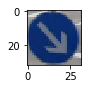

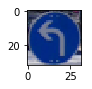

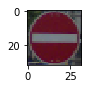

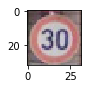

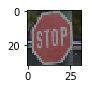

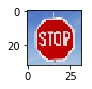

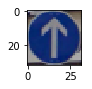

In [104]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import cv2
import glob
import pandas as pd

# from Google Maps Street View
# should be 34, 40, 1, 14, 14, 36
german_street_signs = []
labels = [38, 34, 17, 1, 14, 14, 35]

img_files = glob.glob('traffic-images-online/*.png')

def get_sign_names():
    return pd.read_csv('./signnames.csv').values

for file in img_files: 
    img =  cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2RGB)
    resized_img = cv2.resize(img, (32, 32)) 
    german_street_signs.append(resized_img)
    
for sign in german_street_signs:  
    image = sign.squeeze()
    plt.figure(figsize=(1,1))
    plt.imshow(image, cmap="gray")

plt.show()


### Predict the Sign Type for Each Image

In [109]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

street_signs = np.asarray(german_street_signs)
street_signs_gry = np.sum(street_signs/3, axis=3, keepdims=True)
street_signs_norm = (street_signs_gry - 128)/128 

sign_names = get_sign_names()

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))  
    logits_predicted = sess.run(logits, feed_dict={x: street_signs_norm, keep_prob: 1.0})
    labels_predicted = np.argmax(logits_predicted, axis=1)
    for i in range(len(street_signs_norm)):
        print("Image {0} classified as {1}".format(i+1, sign_names[labels_predicted[i]]))



INFO:tensorflow:Restoring parameters from .\lenet-traffic
Image 1 classified as [38 'Keep right']
Image 2 classified as [34 'Turn left ahead']
Image 3 classified as [17 'No entry']
Image 4 classified as [1 'Speed limit (30km/h)']
Image 5 classified as [14 'Stop']
Image 6 classified as [14 'Stop']
Image 7 classified as [35 'Ahead only']


### Analyze Performance

In [81]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(street_signs_norm, labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from .\lenet-traffic
Test Accuracy = 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [97]:
softmax_prob = tf.nn.softmax(logits)
top_5 = tf.nn.top_k(softmax_prob, k=5)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet-traffic.meta')
    saver.restore(sess, "./lenet-traffic")
    softmax_prob = sess.run(softmax_prob, feed_dict={x: street_signs_norm, keep_prob: 1.0})
    top_5_likely = sess.run(top_5, feed_dict={x: street_signs_norm, keep_prob: 1.0})
    for i,indice in enumerate(top_5_likely.indices):
        first = sign_names[indice[0]]
        second = sign_names[indice[1]]
        third  = sign_names[indice[2]]
        fourth  = sign_names[indice[3]]
        fifth  = sign_names[indice[4]]       
        print(first, second, third, fourth, fifth )
        print(top_5_likely.values[i])



INFO:tensorflow:Restoring parameters from ./lenet-traffic
[38 'Keep right'] [23 'Slippery road'] [12 'Priority road'] [2 'Speed limit (50km/h)'] [18 'General caution']
[  1.00000000e+00   3.65709440e-15   6.34509734e-16   5.07030587e-16
   2.19745440e-16]
[34 'Turn left ahead'] [38 'Keep right'] [11 'Right-of-way at the next intersection'] [35 'Ahead only'] [12 'Priority road']
[  1.00000000e+00   1.84884446e-08   1.14551302e-08   5.85653304e-10
   2.95157215e-12]
[17 'No entry'] [14 'Stop'] [9 'No passing'] [29 'Bicycles crossing'] [3 'Speed limit (60km/h)']
[  1.00000000e+00   5.30275625e-14   4.20760202e-16   3.07622368e-23
   1.58027583e-23]
[1 'Speed limit (30km/h)'] [6 'End of speed limit (80km/h)'] [5 'Speed limit (80km/h)'] [7 'Speed limit (100km/h)'] [40 'Roundabout mandatory']
[  1.00000000e+00   5.35239575e-10   8.21898353e-20   6.34561348e-21
   3.51831136e-21]
[14 'Stop'] [13 'Yield'] [34 'Turn left ahead'] [38 'Keep right'] [4 'Speed limit (70km/h)']
[  9.99890447e-01   1

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")